# Model to predict what group may have been responsible for a given incident of terrorism.
Terrorism is ont of the biggest challenges Facing humanity in current times and in the recent past. The fignt against Terrorism has always been a concern to most countries if not all. One way to fight this challenge is going to the root and Identify the perpetrators of the crimes. In this work we try to identify groups that may be linked to different incidences of crime.

The datase used in this project is from the Global Terrorism Database (GTD) which is is an open-source database including information on terrorist events around the world from 1970 through 2014. 
From this dataset attack linked to Terrorism is defined to be have three major characteristics; it must be intentional, it must have violence or threat of violence and it must be done by non-state organizations



In [1]:
'''We first import the libraries we need in the entire model'''
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np # linear algebra operations
import pandas as pd # For inputing csv files
import matplotlib.pyplot as plt # For plotting 
import tensorflow as tf # For neural networks/deep learning 
%matplotlib inline  

We begin by reading the data into a dataframe and then munch, visualize and do further analysis on it.

In [2]:
#Read the data into pandas dataframe
data0 = pd.read_csv('../GTD_0718dist/data.csv')

/home/ketoyo/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
unneeded = ['eventid','iyear','imonth','iday','approxdate','extended','resolution',
'country','country_txt','region','region_txt','provstate','city','latitude','longitude',
'specificity','vicinity','location','summary','crit1','crit2','crit3','doubtterr',
'alternative','alternative_txt','multiple','success','suicide',
#'attacktype1',
#'attacktype1_txt',
 #'attacktype2',
'attacktype2_txt',
#'attacktype3',
'attacktype3_txt',
# 'targtype1',
'targtype1_txt',# 'targsubtype1',
'targsubtype1_txt', 'corp1','target1','natlty1',
'natlty1_txt',#'targtype2',
 'targtype2_txt',#'targsubtype2',
'targsubtype2_txt','corp2','target2','natlty2',
'natlty2_txt',#'targtype3',
'targtype3_txt',#'targsubtype3',
'targsubtype3_txt','corp3','target3','natlty3',
'natlty3_txt',
 #'gname',
'gsubname','gname2','gsubname2','gname3','gsubname3',
'motive','guncertain1','guncertain2','guncertain3','individual','nperps',
'nperpcap',#'claimed',
'claimmode','claimmode_txt',
 #'claim2',
'claimmode2','claimmode2_txt',
#'claim3',
'claimmode3','claimmode3_txt','compclaim',
 #'weaptype1',
#'weaptype1_txt',#'weapsubtype1',
'weapsubtype1_txt',#'weaptype2',
 'weaptype2_txt',#'weapsubtype2',
'weapsubtype2_txt',#'weaptype3',
'weaptype3_txt',#'weapsubtype3',
'weapsubtype3_txt', #'weaptype4',
'weaptype4_txt',#'weapsubtype4',
 'weapsubtype4_txt','weapdetail',
#'nkill',
#'nkillus','nkillter','nwound','nwoundus','nwoundte','property','propextent',
'propextent_txt',#'propvalue', 
            'propcomment',#'ishostkid','nhostkid','nhostkidus','nhours','ndays',
            'divert',
'kidhijcountry',#'ransom','ransomamt','ransomamtus','ransompaid','ransompaidus',
'ransomnote',#'hostkidoutcome',
'hostkidoutcome_txt',#'nreleased',
'addnotes','scite1',
'scite2','scite3','dbsource','INT_LOG','INT_IDEO','INT_MISC','INT_ANY','related']

In [4]:
#Drop the columns that are not of interest and fill all NaN values with 0.
data1 = data0.drop(unneeded, axis=1)
data1 = data1.fillna(0)

Our main activity is to find different groups of people responsible for given attacks. We dont have the groups of people, we therefore have to derive the groups from the data available.To find our labels (groups involved), we will have to find frequently appearing words in the Perpetrator Group Name  that can be linked to a given group. We search for these frequently appearing words then label the given entry with a name from these frequently appearing words.

In [5]:
#Split the Perpetrator Group Name (gname) to identify frequently occuring words
data3 = data1.gname.str.split(expand=True).stack().value_counts()

In [6]:
#View some friquently occuring words.
data3.head(20)

Unknown          82782
of               19956
Liberation       12942
the              10696
Army             10518
Islamic           9569
Front             9431
National          9129
and               8250
Taliban           7520
State             7307
Iraq              6421
Levant            5614
(ISIL)            5613
People's          5493
Revolutionary     5106
Party             4936
Path              4558
(SL)              4555
Shining           4555
dtype: int64

Create dataframes with the Perpetrator Group Name being one of the frequently appearing names of perpetrators. we then merge the dataframes together

In [7]:
tempdata1 = data1[data1['gname'].str.contains("Revolutionary")].head(3292)
tempdata2 = data1[data1['gname'].str.contains("Christian")].head(3292)
tempdata3 = data1[data1['gname'].str.contains("Al-Shabaab")].head(3292)
tempdata4 = data1[data1['gname'].str.contains("Liberation")].head(3292)
tempdata5 = data1[data1['gname'].str.contains("Taliban")].head(3292)
tampdata1=tempdata1.loc[:,"gname"] = "Revolutionary"
tampdata2=tempdata2.loc[:,"gname"] = "Christian"
tampdata3=tempdata3.loc[:,"gname"] = "Al-Shabaab"
tampdata4=tempdata4.loc[:,"gname"] = "Liberation"
tampdata5=tempdata5.loc[:,"gname"] = "Taliban"

We then merge the dataframes into one dataframe. The group of Christians have only 25 entries (25entries are too few compared to entries in the the other datasets) therefore it is not included in the analysis.

In [8]:
#merge the dataframes
 data2= pd.concat([tempdata1, tempdata3,tempdata4,tempdata5],sort=False) 

In [9]:
#View a few entries of the dataframe
data2.head()

,attacktype1,attacktype1_txt,attacktype2,attacktype3,targtype1,targsubtype1,targtype2,targsubtype2,targtype3,targsubtype3,...,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased
50,7,Facility/Infrastructure Attack,0.0,0.0,2,21.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,7,Facility/Infrastructure Attack,0.0,0.0,21,107.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,7,Facility/Infrastructure Attack,0.0,0.0,1,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,3,Bombing/Explosion,0.0,0.0,1,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,3,Bombing/Explosion,0.0,0.0,1,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We are going to do some analysis on this data to see if we can find some important information that can inform us on the best steps and decisions and assumptions to make.

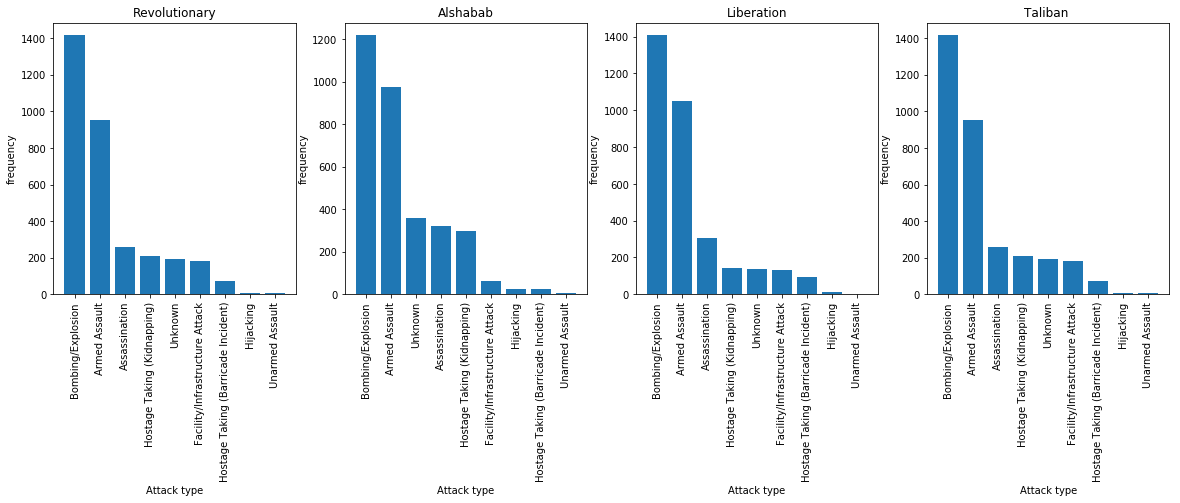

In [10]:
#Attack type for the four groups of perpetrators
plt.figure(figsize=(20, 5))
count1 = tempdata1['attacktype1_txt'].value_counts()
attacktype1 = tempdata1['attacktype1_txt'].value_counts().keys()
plt.subplot(1,4,1)
plt.bar(attacktype1, count1)
plt.ylabel('frequency')
plt.xlabel('Attack type')
plt.title('Revolutionary')
plt.xticks(rotation=90)

count1 = tempdata3['attacktype1_txt'].value_counts()
attacktype1 = tempdata3['attacktype1_txt'].value_counts().keys()
plt.subplot(1, 4, 2)
plt.bar(attacktype1, count1)
plt.ylabel('frequency')
plt.xlabel('Attack type')
plt.title('Alshabab')
plt.xticks(rotation=90)

count1 = tempdata4['attacktype1_txt'].value_counts()
attacktype1 = tempdata4['attacktype1_txt'].value_counts().keys()
plt.subplot(1, 4, 3)
plt.bar(attacktype1, count1)
plt.ylabel('frequency')
plt.xlabel('Attack type')
plt.title('Liberation')
plt.xticks(rotation=90)

count1 = tempdata1['attacktype1_txt'].value_counts()
attacktype1 = tempdata1['attacktype1_txt'].value_counts().keys()
plt.subplot(1, 4,4)
plt.bar(attacktype1, count1)
plt.ylabel('frequency')
plt.xlabel('Attack type')
plt.title('Taliban ')
plt.xticks(rotation=90)
plt.show()


From the above plots we can see that all groups frequently attacked by bombing and armed asault. Besides these two Histage Taking(Kidnapping) was used more frequently by the Revolutionary group compared to the other groups.

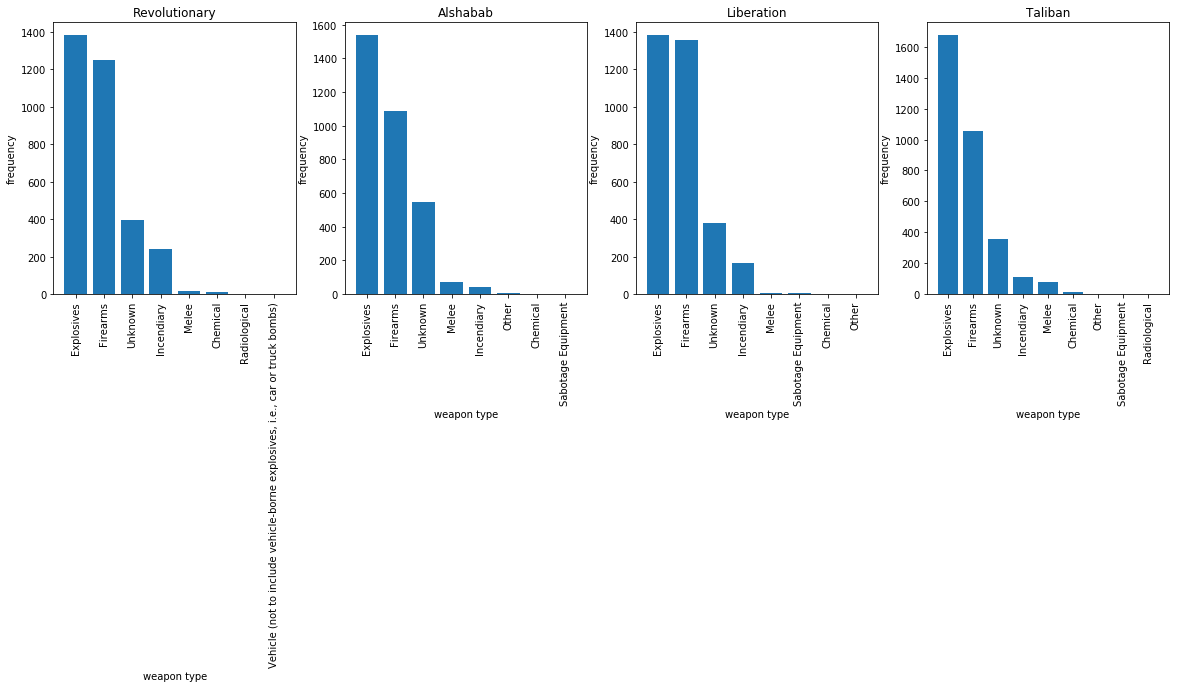

In [11]:
#Weapon used by the four ftoup of perpetrators
plt.figure(figsize=(20, 5))
count = tempdata1['weaptype1_txt'].value_counts()
weapontype1 = tempdata1['weaptype1_txt'].value_counts().keys()
plt.subplot(1, 4, 1)
plt.bar(weapontype1, count)
plt.ylabel('frequency')
plt.xlabel('weapon type')
plt.title('Revolutionary')
plt.xticks(rotation=90)

count = tempdata3['weaptype1_txt'].value_counts()
weapontype1 = tempdata3['weaptype1_txt'].value_counts().keys()
plt.subplot(1, 4, 2)
plt.bar(weapontype1, count)
plt.ylabel('frequency')
plt.xlabel('weapon type')
plt.title('Alshabab')
plt.xticks(rotation=90)

count = tempdata4['weaptype1_txt'].value_counts()
weapontype1 = tempdata4['weaptype1_txt'].value_counts().keys()
plt.subplot(1, 4,3)
plt.bar(weapontype1, count)
plt.ylabel('frequency')
plt.xlabel('weapon type')
plt.title('Liberation')
plt.xticks(rotation=90)

count = tempdata5['weaptype1_txt'].value_counts()
weapontype1 = tempdata5['weaptype1_txt'].value_counts().keys()
plt.subplot(1, 4, 4)
plt.bar(weapontype1, count)
plt.ylabel('frequency')
plt.xlabel('weapon type')
plt.title('Taliban')
plt.xticks(rotation=90)
plt.show()

Although all the groups use explosives as their weapon, Revolutionary used explosives as almost much as they used firearms.
For explosives; 
Revolutionary > 2300 but < 2500
Alshabab >1500 but < 1600
Liberation > 5500 but < 6000 --
Liberation group are more likely to use explosive,
                

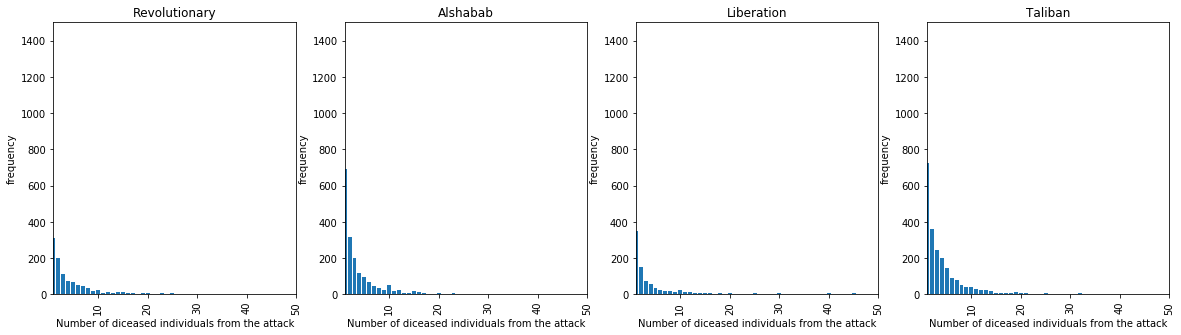

In [12]:
#Weapon used by the four ftoup of perpetrators
plt.figure(figsize=(20, 5))
count = tempdata1['nkill'].value_counts()
weapontype1 = tempdata1['nkill'].value_counts().keys()
plt.subplot(1, 4, 1)
plt.ylim(1, 1500)
plt.xlim(1, 50)
plt.bar(weapontype1, count)
plt.ylabel('frequency')
plt.xlabel('Number of diceased individuals from the attack')
plt.title('Revolutionary')
plt.xticks(rotation=90)

count = tempdata3['nkill'].value_counts()
weapontype1 = tempdata3['nkill'].value_counts().keys()
plt.subplot(1, 4, 2)
plt.ylim(1, 1500)
plt.xlim(1, 50)
plt.bar(weapontype1, count)
plt.ylabel('frequency')
plt.xlabel('Number of diceased individuals from the attack')
plt.title('Alshabab')
plt.xticks(rotation=90)

count = tempdata4['nkill'].value_counts()
weapontype1 = tempdata4['nkill'].value_counts().keys()
plt.subplot(1, 4,3)
plt.ylim(1, 1500)
plt.xlim(1, 50)
plt.bar(weapontype1, count)
plt.ylabel('frequency')
plt.xlabel('Number of diceased individuals from the attack')
plt.title('Liberation')
plt.xticks(rotation=90)

count = tempdata5['nkill'].value_counts()
weapontype1 = tempdata5['nkill'].value_counts().keys()
plt.subplot(1, 4, 4)
plt.ylim(1, 1500)
plt.xlim(1, 50)
plt.bar(weapontype1, count)
plt.ylabel('frequency')
plt.xlabel('Number of diceased individuals from the attack')
plt.title('Taliban')
plt.xticks(rotation=90)
plt.show()

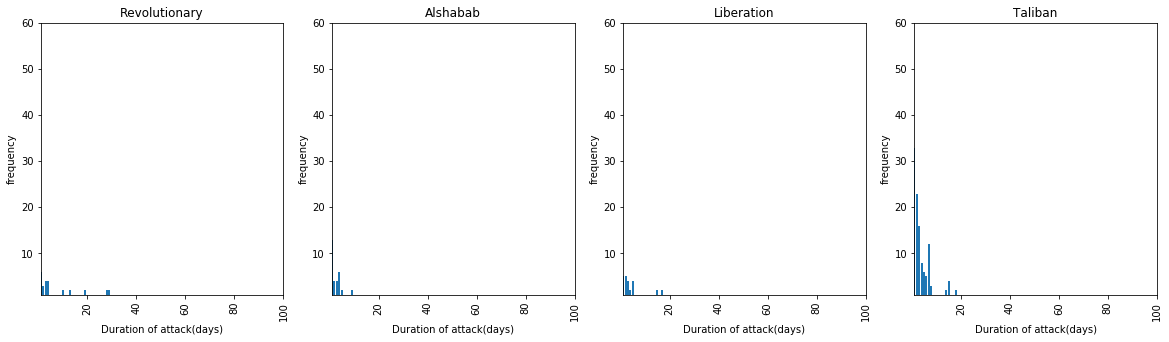

In [13]:
#Duration of attack(days) for the four group of perpetrators
plt.figure(figsize=(20, 5))
count = tempdata1['ndays'].value_counts()
weapontype1 = tempdata1['ndays'].value_counts().keys()
plt.subplot(1, 4, 1)
plt.xlim(1, 100)
plt.ylim(1, 60)
plt.bar(weapontype1, count)
plt.ylabel('frequency')
plt.xlabel('Duration of attack(days)')
plt.title('Revolutionary')
plt.xticks(rotation=90)

count = tempdata3['ndays'].value_counts()
weapontype1 = tempdata3['ndays'].value_counts().keys()
plt.subplot(1, 4, 2)
plt.xlim(1, 100)
plt.ylim(1, 60)
plt.bar(weapontype1, count)
plt.ylabel('frequency')
plt.xlabel('Duration of attack(days)')
plt.title('Alshabab')
plt.xticks(rotation=90)

count = tempdata4['ndays'].value_counts()
weapontype1 = tempdata4['ndays'].value_counts().keys()
plt.subplot(1, 4,3)
plt.xlim(1, 100)
plt.ylim(1, 60)
plt.bar(weapontype1, count)
plt.ylabel('frequency')
plt.xlabel('Duration of attack(days)')
plt.title('Liberation')
plt.xticks(rotation=90)

count = tempdata5['ndays'].value_counts()
weapontype1 = tempdata5['ndays'].value_counts().keys()
plt.subplot(1, 4, 4)
plt.xlim(1, 100)
plt.ylim(1, 60)
plt.bar(weapontype1, count)
plt.ylabel('frequency')
plt.xlabel('Duration of attack(days)')
plt.title('Taliban')
plt.xticks(rotation=90)
plt.show()

Looking at the number of days an attack lasts. Alshabab had attacks lasting for fewer days while Revolutionary and Liberation had attacks lasting even upto over 80 days. This can also help to distinguish some Revolutionary and Revolutionary groups from the other groups.

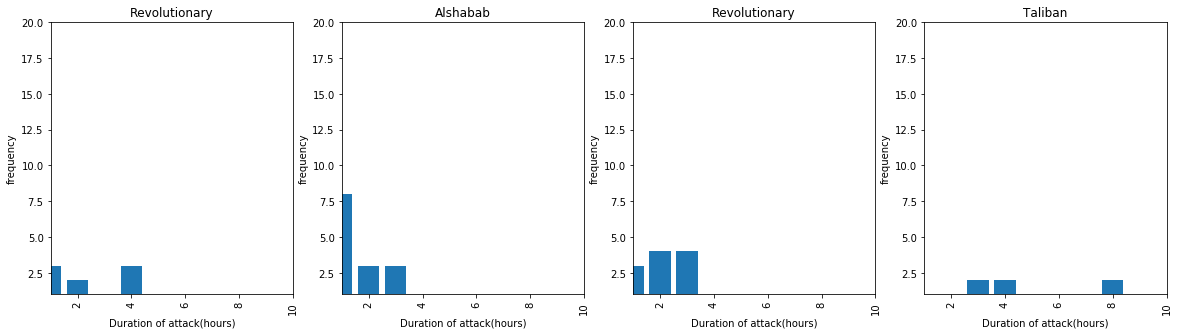

In [14]:
#Duration of attack(hours) by the four ftoup of perpetrators
plt.figure(figsize=(20, 5))
count = tempdata1['nhours'].value_counts()
weapontype1 = tempdata1['nhours'].value_counts().keys()
plt.subplot(1, 4, 1)
plt.xlim(1, 10)
plt.ylim(1, 20)
plt.bar(weapontype1, count)
plt.ylabel('frequency')
plt.xlabel('Duration of attack(hours)')
plt.title('Revolutionary')
plt.xticks(rotation=90)

count = tempdata3['nhours'].value_counts()
weapontype1 = tempdata3['nhours'].value_counts().keys()
plt.subplot(1, 4, 2)
plt.xlim(1, 10)
plt.ylim(1, 20)
plt.bar(weapontype1, count)
plt.ylabel('frequency')
plt.xlabel('Duration of attack(hours)')
plt.title('Alshabab')
plt.xticks(rotation=90)

count = tempdata4['nhours'].value_counts()
weapontype1 = tempdata4['nhours'].value_counts().keys()
plt.subplot(1, 4,3)
plt.xlim(1, 10)
plt.ylim(1, 20)
plt.bar(weapontype1, count)
plt.ylabel('frequency')
plt.xlabel('Duration of attack(hours)')
plt.title('Revolutionary')
plt.xticks(rotation=90)

count = tempdata5['nhours'].value_counts()
weapontype1 = tempdata5['nhours'].value_counts().keys()
plt.subplot(1, 4, 4)
plt.xlim(1, 10)
plt.ylim(1, 20)
plt.bar(weapontype1, count)
plt.ylabel('frequency')
plt.xlabel('Duration of attack(hours)')
plt.title('Taliban')
plt.xticks(rotation=90)
plt.show()

Looking at hours too taliban have some attacks taking upto 8 hours while Alshabab their attacks tale less than two hours. Which can contribute to the difference between the two groups

In the analysis above, linearly the groups extracted are correlated in very many instances. However we are going to employ the Artificial Neural Network algorithhm that can extraxt even non linear relationships between the data. We implement the artificial neural network using the Tensorflow libraries Abadi et al. (2015).

In [15]:
def split_traintest( ):
    '''This function reads gets the data frame and splits the data into 
    train set and test set'''
    haward = data2
    haward = haward.drop(["attacktype1_txt","weaptype1_txt"], axis=1)
    print(haward.shape)
    print(len(haward['gname'].tolist()))
    PRIMARY = haward.gname.unique().tolist()
    #haward = haward.drop("tumour", axis=1)
    haward.gname = pd.Categorical(haward.gname).codes
    haward = haward.astype(np.int64)
    #divide train and test
    msk = np.random.rand(len(haward)) < 0.6
    train = haward[msk]
    test = haward[~msk]
    return train,test

In [16]:
def load_data(p,y_name='gname'):
    """Extracts the labels from the train and test dataset together with the 
    labels as (train_x, train_y), (test_x, test_y)."""
    train,test = split_traintest()
    train_x, train_y = train, train.pop(y_name)
    test_x, test_y = test, test.pop(y_name)

    return (train_x, train_y), (test_x, test_y)

In [17]:
def train_input_fn(features, labels, batch_size):
    """An input function for training
    Convert the inputs to a Dataset.
    Shuffle, repeat, and batch the examples.
    Return the dataset."""
    
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    dataset = dataset.shuffle(1000).repeat().batch(batch_size)
    return dataset

In [18]:
def eval_input_fn(features, labels, batch_size):
    """An input function for evaluation or prediction
    Convert the inputs to a Dataset.
    Batch the examples
    Return the dataset."""
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)
        
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)
    
    return dataset


In [19]:
def my_model(features, labels, mode, params):
    """This function implements a Deep Neural Network (DNN) with three hidden layers 
    and dropout of 0.1 probability."""
    # Create three fully connected layers each layer having a dropout probability of 0.1.
    net = tf.feature_column.input_layer(features, params['feature_columns'])
    for units in params['hidden_units']:
        net = tf.layers.dense(net, units=units, activation=tf.nn.relu)

    # Compute logits (1 per class).
    logits = tf.layers.dense(net, params['n_classes'], activation=None)

    # Compute predictions.
    predicted_classes = tf.argmax(logits, 1)
    if mode == tf.estimator.ModeKeys.PREDICT:
        predictions = {
            'class_ids': predicted_classes[:, tf.newaxis],
            'probabilities': tf.nn.softmax(logits),
            'logits': logits,
        }
        return tf.estimator.EstimatorSpec(mode, predictions=predictions)

    # Compute loss.
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

    # Compute evaluation metrics.
    accuracy = tf.metrics.accuracy(labels=labels,
                                   predictions=predicted_classes,
                                   name='acc_op')
    metrics = {'accuracy': accuracy}
    tf.summary.scalar('accuracy', accuracy[1])

    if mode == tf.estimator.ModeKeys.EVAL:
        return tf.estimator.EstimatorSpec(
            mode, loss=loss, eval_metric_ops=metrics)

    # Create training op.
    assert mode == tf.estimator.ModeKeys.TRAIN

    optimizer = tf.train.AdagradOptimizer(learning_rate=0.1)
    train_op = optimizer.minimize(loss, global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode, loss=loss, train_op=train_op)

We now create and run the main function.
We consider a batchsize of 1000 entries and 10000 training steps.

In [20]:
batch_size =3000
train_steps =5000
def main(argv):
    # Fetch the data
    mypcas = [13168]#[150]
    for p in mypcas:
        (train_x,train_y),(test_x,test_y) = load_data(p)

        # Feature columns describe how to use the input.
        my_feature_columns = []
        for key in train_x.keys():
            my_feature_columns.append(tf.feature_column.numeric_column(key=key))

        # Build 2 hidden layer DNN with 10, 10 units respectively.
        classifier = tf.estimator.Estimator(
            model_fn=my_model,
            params={
                'feature_columns': my_feature_columns,
                # Two hidden layers of 10 nodes each.
                'hidden_units': [20,10,10],
                # The model must choose between 3 classes.
                'n_classes': 4,
            })

        # Train the Model.
        classifier.train(
            input_fn=lambda:train_input_fn(train_x, train_y, batch_size),
            steps=train_steps)

        # Evaluate the model.
        eval_result = classifier.evaluate(
            input_fn=lambda:eval_input_fn(test_x, test_y, batch_size))

        print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))
        eval_result1 = classifier.evaluate(
        	input_fn=lambda:eval_input_fn(train_x, train_y, batch_size))
        print('\nTrain set accuracy: {accuracy:0.3f}\n'.format(**eval_result1))


if __name__ == '__main__':
    tf.logging.set_verbosity(tf.logging.INFO)
    tf.app.run(main)

(13168, 42)
13168
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_service': None, '_is_chief': True, '_keep_checkpoint_max': 5, '_eval_distribute': None, '_global_id_in_cluster': 0, '_protocol': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_task_type': 'worker', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f88d0d29048>, '_master': '', '_num_worker_replicas': 1, '_save_summary_steps': 100, '_evaluation_master': '', '_tf_random_seed': None, '_save_checkpoints_secs': 600, '_train_distribute': None, '_model_dir': '/tmp/tmpiualv0pz', '_device_fn': None, '_num_ps_replicas': 0, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_task_id': 0, '_experimental_distribute': None}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:t

SystemExit: 

/home/ketoyo/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<H2>References</H2>
Abadi, M., Agarwal, A., Barham, P., Brevdo, E., Chen, Z., Citro, C., Corrado, G. S.,
Davis, A., Dean, J., Devin, M., Ghemawat, S., Goodfellow, I., Harp, A., Irving,
G., Isard, M., Jia, Y., Jozefowicz, R., Kaiser, L., Kudlur, M., Levenberg, J., Mané,
D., Monga, R., Moore, S., Murray, D., Olah, C., Schuster, M., Shlens, J., Steiner,
B., Sutskever, I., Talwar, K., Tucker, P., Vanhoucke, V., Vasudevan, V., Viégas,
F., Vinyals, O., Warden, P., Wattenberg, M., Wicke, M., Yu, Y., and Zheng, X.
(2015), “TensorFlow: Large-Scale Machine Learning on Heterogeneous Systems,”
Software available from tensorflow.org.